In [62]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df_original = dataset['train'].to_pandas()

# Data Cleansing
df_original['job_posted_date'] = pd.to_datetime(df_original['job_posted_date'])
df_original['job_skills'] = df_original['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df_altered = df_original.copy()

In [5]:
countries = ['Poland', 'Lithuania', 'Latvia', 'Estonia']
df_PLBAL = df_altered[(df_altered['job_country'].isin(countries))].copy()
df_skills = df_PLBAL.explode('job_skills')


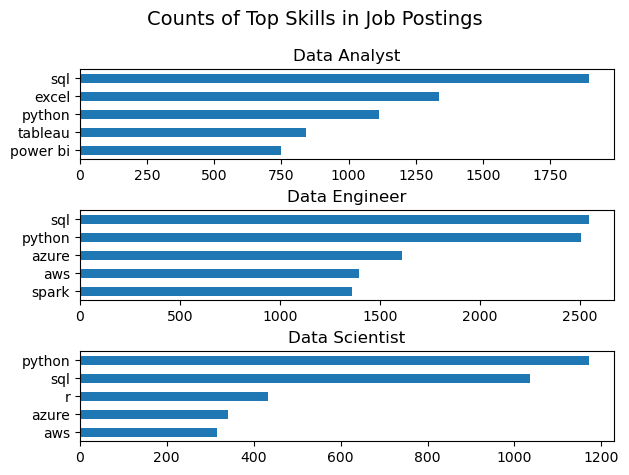

In [37]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size() 
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
fig, ax = plt.subplots(len(job_titles), 1)
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short']==job_title].head(5)
    df_plot.plot(kind='barh',x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
fig.suptitle('Counts of Top Skills in Job Postings', fontsize = 14)
fig.tight_layout(h_pad=0.5)
plt.show()

In [39]:
df_job_title_count = df_PLBAL['job_title_short'].value_counts().reset_index(name='jobs_total')


In [77]:
df_skill_Prc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')
df_skill_Prc['skill_prc'] = df_skill_Prc['skill_count'] / df_skill_Prc['jobs_total']*100


In [81]:
# df_skill_Prc['skill_prc']  - checking

0       63.151365
1       62.233251
2       50.968784
3       39.925558
4       34.689826
          ...    
1429     0.024814
1430     0.146199
1431     0.146199
1432     0.069061
1433     0.051282
Name: skill_prc, Length: 1434, dtype: float64

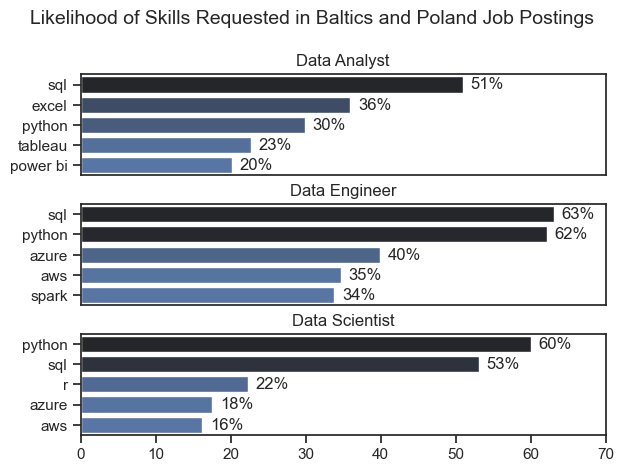

In [83]:
fig, ax = plt.subplots(len(job_titles), 1)
sns.set_theme(style='ticks')
for i, job_title in enumerate(job_titles):
    df_plot = df_skill_Prc[df_skill_Prc['job_title_short']==job_title].head(5)
    #df_plot.plot(kind='barh',x='job_skills', y='skill_prc', ax=ax[i], title=job_title)
    sns.barplot(data=df_plot, x='skill_prc', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_ylabel('')
    ax[i].get_legend().remove()
    ax[i].set_title(job_title)
    ax[i].set_xlabel('')
    ax[i].set_xlim(0,70)
    for n, v in enumerate(df_plot['skill_prc']):
         ax[i].text(v+1, n, f'{v:.0f}%', va='center')
    if i != len(job_titles)-1:
        ax[i].set_xticks([])
fig.suptitle('Likelihood of Skills Requested in Baltics and Poland Job Postings', fontsize = 14)
fig.tight_layout(h_pad=0.5)
plt.show()